# Tutorial: Brd4 bindings for Male/Female mouses bulk callingcards data. 

 The data is from [Kfoury et al., PNAS. (2021)](https://www.pnas.org/doi/10.1073/pnas.2017148118).

In [1]:
import pycallingcards as cc
import numpy as np
import pandas as pd
import scanpy as sc



Read bulk calling cards ccf data for both female and male. The columns indecates the chromosome, the start, end point of each htop, read number, direction and cell barcodes. Give them another column to distinguish.

In [2]:
F6_Brd4 = cc.datasets.mouse_brd4_data(data="Female_Brd4")
F6_Brd4['sample'] = "F6_Brd4"
F6_Brd4

,0,1,2,3,4,5,sample
0,chr1,3478112,3478115,1,+,TTTGTCCAA,F6_Brd4
1,chr1,3514554,3514557,1,-,TCGCTGGCT,F6_Brd4
2,chr1,3516833,3516836,2,+,TGTCGTGCA,F6_Brd4
3,chr1,3630031,3630034,7,+,TTTGTCCAA,F6_Brd4
4,chr1,3904411,3904414,1,-,TTTGTCCAA,F6_Brd4
...,...,...,...,...,...,...,...
668520,chrX,169982399,169982402,1,-,TATACTCTA,F6_Brd4
668521,chrY,42512547,42512550,3,-,TGTCGTGCA,F6_Brd4
668522,chrY,90801372,90801375,1,-,TGACTTAAT,F6_Brd4
668523,chrY,90803580,90803583,1,-,TGTCGTGCA,F6_Brd4


In [3]:
M6_Brd4 = cc.datasets.mouse_brd4_data(data="Male_Brd4")
M6_Brd4['sample'] = "M6_Brd4"
M6_Brd4

,0,1,2,3,4,5,sample
0,chr1,3493276,3493279,1,+,TACTTTCCG,M6_Brd4
1,chr1,3493342,3493345,8,+,ATGAAAGCA,M6_Brd4
2,chr1,3493644,3493647,3,+,TCTACTGCC,M6_Brd4
3,chr1,3494018,3494021,1,+,TCTACTGCC,M6_Brd4
4,chr1,3508902,3508905,1,+,TACTTTCCG,M6_Brd4
...,...,...,...,...,...,...,...
613723,chrY,90801152,90801155,2,-,GATCTTATG,M6_Brd4
613724,chrY,90803734,90803737,13,-,TACTTTCCG,M6_Brd4
613725,chrY,90803734,90803737,9,-,CACGGCGGA,M6_Brd4
613726,chrY,90803734,90803737,17,-,GATCTTATG,M6_Brd4


In [4]:
Brd4 = pd.concat([F6_Brd4, M6_Brd4]).sort_values(by=[0,1]).reset_index(drop = True)
Brd4

,0,1,2,3,4,5,sample
0,chr1,3478112,3478115,1,+,TTTGTCCAA,F6_Brd4
1,chr1,3493276,3493279,1,+,TACTTTCCG,M6_Brd4
2,chr1,3493342,3493345,8,+,ATGAAAGCA,M6_Brd4
3,chr1,3493644,3493647,3,+,TCTACTGCC,M6_Brd4
4,chr1,3494018,3494021,1,+,TCTACTGCC,M6_Brd4
...,...,...,...,...,...,...,...
1282248,chrY,90803734,90803737,13,-,TACTTTCCG,M6_Brd4
1282249,chrY,90803734,90803737,9,-,CACGGCGGA,M6_Brd4
1282250,chrY,90803734,90803737,17,-,GATCTTATG,M6_Brd4
1282251,chrY,90803775,90803778,4,-,ATGAAAGCA,M6_Brd4


In [5]:
F6_WT = cc.datasets.mouse_brd4_data(data="Female_WT")

In [6]:
M6_WT = cc.datasets.mouse_brd4_data(data="Male_WT")

In [7]:
WT = pd.concat([F6_WT, M6_WT]).sort_values(by=[0,1]).reset_index(drop = True)
WT

,0,1,2,3,4,5
0,chr1,3106291,3106294,1,-,TCATAATTA
1,chr1,3198968,3198971,3,-,ACGCCCAGC
2,chr1,3246013,3246016,1,-,ACGCCCAGC
3,chr1,3299133,3299136,2,+,TCATAATTA
4,chr1,3302464,3302467,1,+,AAGTGTCCC
...,...,...,...,...,...,...
1953470,chrY,90805131,90805134,7,-,CTAGGTGGA
1953471,chrY,90805131,90805134,5,-,TCATAATTA
1953472,chrY,90805421,90805424,2,-,CAGAATTTA
1953473,chrY,90805663,90805666,1,-,AAGTGTCCC


We now call the peaks under the backgroud of wild type to diagnose potential binding sites.

In [8]:
peak_data = cc.pp.callpeaks(Brd4, WT, method = "test", reference = "mm10", pvalue_cutoffbg = 0.1, maxbetween = 2000,
                  pvalue_cutoffTTAA = 0.001, lam_win_size = None,  pseudocounts = 0.1, record = True, save = "peak.bed")
peak_data

For the test method with background, [expdata, background, reference, pvalue_cutoffbg, pvalue_cutoffTTAA, lam_win_size, pseudocounts, minlen, extend, maxbetween, test_method, min_hops, record] would be utilized.


100%|██████████| 21/21 [00:33<00:00,  1.59s/it]


,Chr,Start,End,Experiment Hops,Background Hops,Reference Hops,Expected Hops background,Expected Hops Reference,pvalue Background,pvalue Reference
0,chr1,4196845,4200095,13,10,25,16.870817,2.128351,1.030747e-02,6.217434e-08
1,chr1,4856929,4863861,100,88,66,44.374957,5.454847,4.662091e-07,0.000000e+00
2,chr1,4912815,4916757,11,6,22,14.858319,1.884949,1.183628e-03,7.444173e-07
3,chr1,5082654,5085742,25,20,21,14.187486,1.803815,1.641877e-03,0.000000e+00
4,chr1,5608050,5609460,5,1,5,3.454163,0.505670,1.511965e-04,1.508370e-05
...,...,...,...,...,...,...,...,...,...,...
17210,chrY,1009770,1011742,17,20,22,11.100000,0.104942,1.559937e-02,0.000000e+00
17211,chrY,1241882,1246464,23,30,50,25.100000,0.111231,2.082836e-02,0.000000e+00
17212,chrY,1267935,1271185,5,1,27,13.600000,0.106065,3.885608e-05,1.805715e-09
17213,chrY,1282449,1287505,25,22,60,30.100000,0.113477,9.448711e-05,0.000000e+00



In order to choose good paramenters/method for peak calling. Taking a look at the genome is strongly adviced.

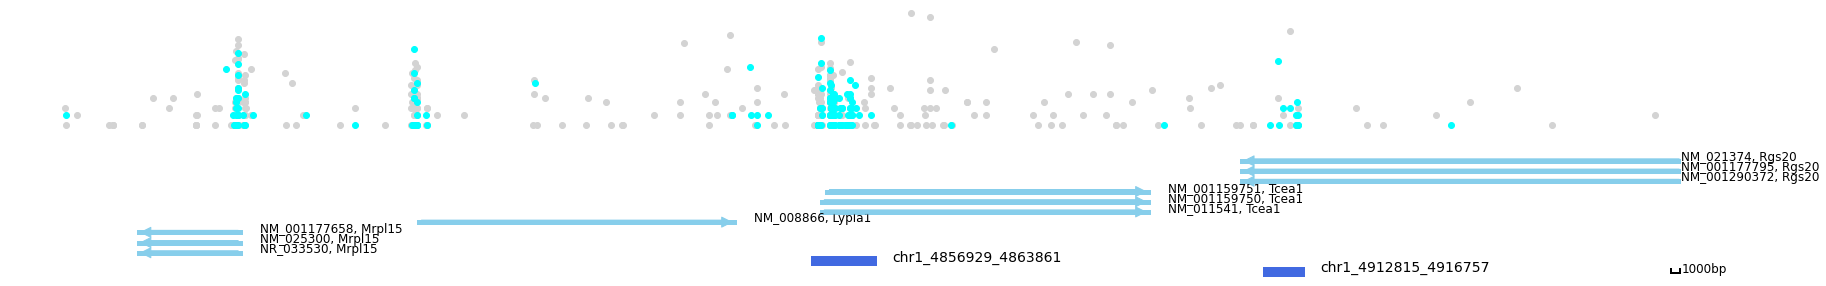

In [9]:
cc.pl.draw_area("chr1",4856929,4863861,100000,peak_data, Brd4, "mm10", WT,
                figsize = (30,5),peak_line = 2,save = False, example_length = 1000)

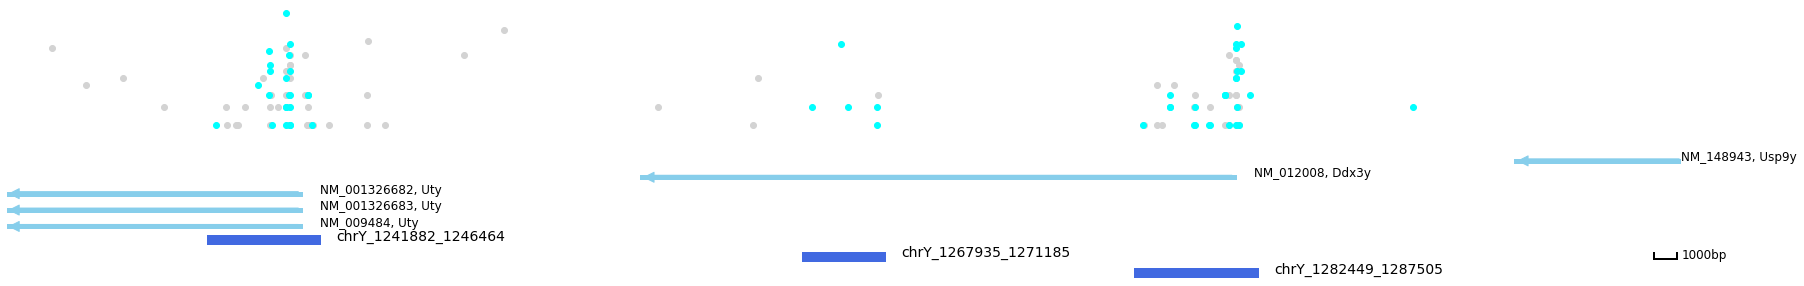

In [10]:
cc.pl.draw_area("chrY",1267935,1271185,35000,peak_data, Brd4, "mm10", WT,
                figsize = (30,5),peak_line = 3,save = False, example_length = 1000)

Find out the closest genes for each peak to annotate.

In [11]:
peak_annotation = cc.pp.annotation(peak_data, reference = "mm10", method = "bedtools")
peak_annotation = cc.pp.combine_annotation(peak_data,peak_annotation)
peak_annotation

In the bedtools method, we would use bedtools in the default path. Set bedtools path by 'bedtools_path' if needed.


,Chr,Start,End,Experiment Hops,Background Hops,Reference Hops,Expected Hops background,Expected Hops Reference,pvalue Background,pvalue Reference,Nearest Refseq1,Gene Name1,Nearest Refseq2,Gene Name2
0,chr1,4196845,4200095,13,10,25,16.870817,2.128351,1.030747e-02,6.217434e-08,NM_001195662,Rp1,NM_011283,Rp1
1,chr1,4856929,4863861,100,88,66,44.374957,5.454847,4.662091e-07,0.000000e+00,NM_011541,Tcea1,NM_008866,Lypla1
2,chr1,4912815,4916757,11,6,22,14.858319,1.884949,1.183628e-03,7.444173e-07,NM_001290372,Rgs20,NM_011541,Tcea1
3,chr1,5082654,5085742,25,20,21,14.187486,1.803815,1.641877e-03,0.000000e+00,NM_133826,Atp6v1h,NM_001177795,Rgs20
4,chr1,5608050,5609460,5,1,5,3.454163,0.505670,1.511965e-04,1.508370e-05,NM_001204371,Oprk1,NM_010342,Npbwr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17210,chrY,1009770,1011742,17,20,22,11.100000,0.104942,1.559937e-02,0.000000e+00,NM_012011,Eif2s3y,NR_027507,Tspy-ps
17211,chrY,1241882,1246464,23,30,50,25.100000,0.111231,2.082836e-02,0.000000e+00,NM_009484,Uty,NM_012008,Ddx3y
17212,chrY,1267935,1271185,5,1,27,13.600000,0.106065,3.885608e-05,1.805715e-09,NM_012008,Ddx3y,NM_009484,Uty
17213,chrY,1282449,1287505,25,22,60,30.100000,0.113477,9.448711e-05,0.000000e+00,NM_012008,Ddx3y,NM_148943,Usp9y


Use ccf data, peak data and barcodes data to make a sample by peak anndata object.

In [12]:
adata_ccf = cc.pp.makeAnndata(Brd4, peak_annotation, ["F6_Brd4","M6_Brd4"], key = 'sample')
adata_ccf

AnnData object with n_obs × n_vars = 2 × 17215
    var: 'Chr', 'Start', 'End', 'Experiment Hops', 'Background Hops', 'Reference Hops', 'Expected Hops background', 'Expected Hops Reference', 'pvalue Background', 'pvalue Reference', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2'

Although one peak should have many htops, but there is a chance that all the cells from the peak was filtered by the RNA preprocesssing. In this case, we advice to filter the peaks. 

In [13]:
cc.pp.filter_peaks(adata_ccf, min_counts=5)
adata_ccf

AnnData object with n_obs × n_vars = 2 × 17215
    var: 'Chr', 'Start', 'End', 'Experiment Hops', 'Background Hops', 'Reference Hops', 'Expected Hops background', 'Expected Hops Reference', 'pvalue Background', 'pvalue Reference', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2', 'n_counts'

Differential binding analysis would find out the significant binding for each cluster.

In [14]:
cc.tl.rank_peak_groups(adata_ccf,"Index",method = 'fisher_exact',key_added = 'fisher_exact')

Plot the results for differential binding analysis.

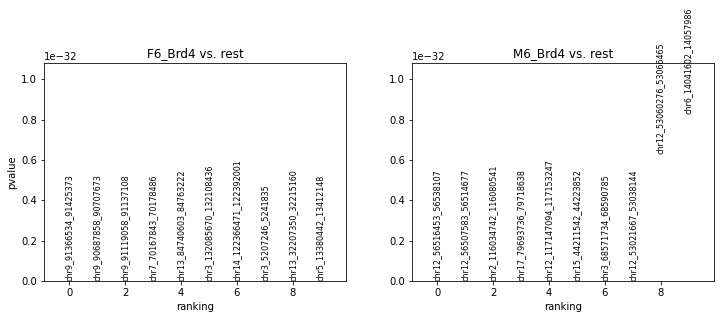

In [15]:
cc.pl.rank_peak_groups(adata_ccf, key = 'fisher_exact')

Take a look at the genome for highly differentiated peaks is strongly adviced.

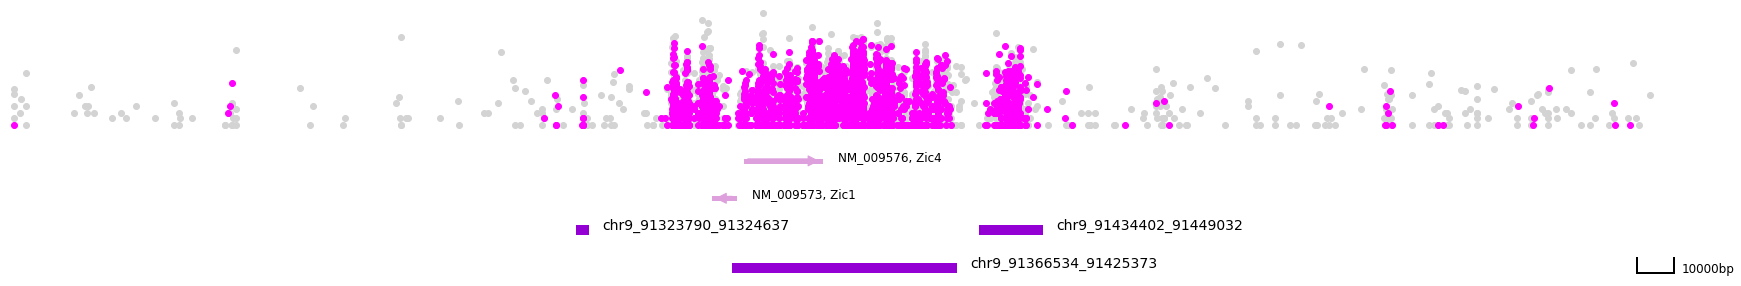

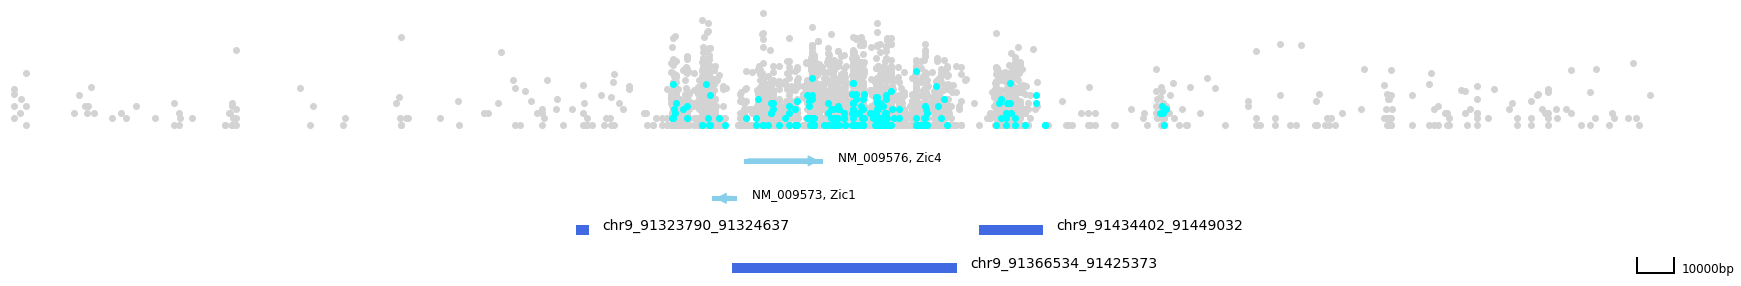

In [16]:
cc.pl.draw_area("chr9",91366534,91425373,200000,peak_data,Brd4,"mm10",adata = adata_ccf, background = WT,
                name = "F6_Brd4",key = "Index",htopkey = "sample", figsize = (30,5),peak_line = 2,color = "purple")
cc.pl.draw_area("chr9",91366534,91425373,200000,peak_data, Brd4,"mm10",adata = adata_ccf, background = WT,
                name = "M6_Brd4",key = "Index", htopkey = "sample", figsize = (30,5),peak_line = 2)

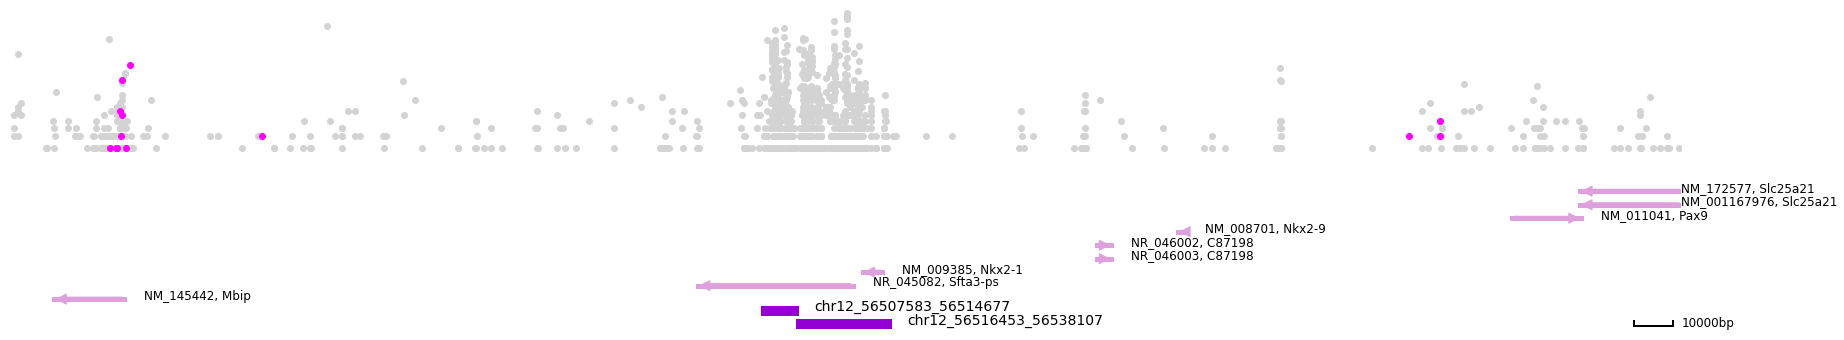

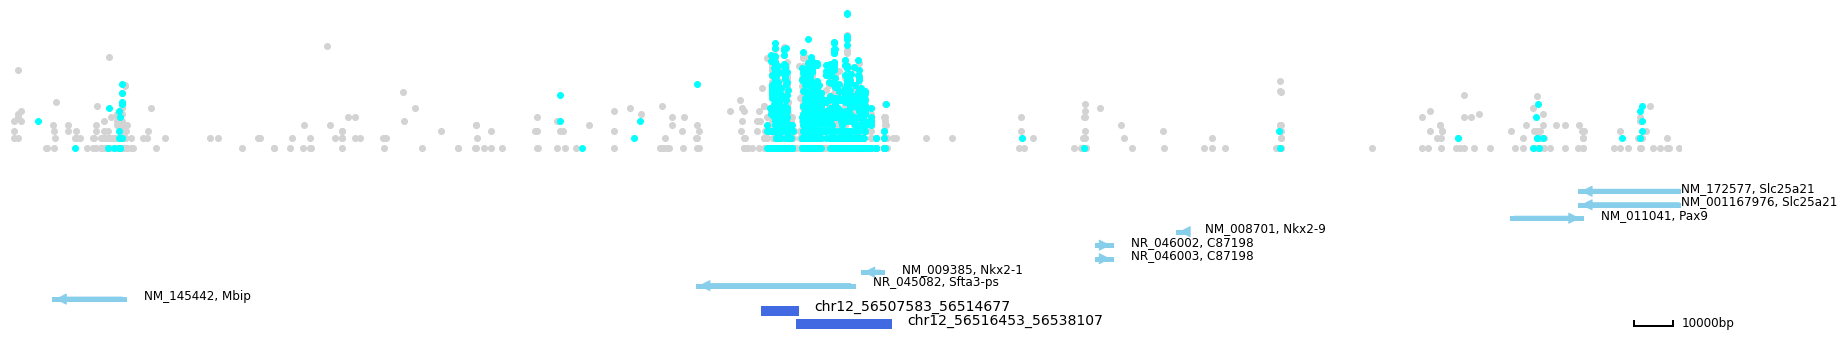

In [17]:
cc.pl.draw_area("chr12",56516453,56538107,200000,peak_data,Brd4,"mm10",adata = adata_ccf, background = WT,
                name = "F6_Brd4",key = "Index",htopkey = "sample", figsize = (30,6),peak_line = 2,color = "purple")
cc.pl.draw_area("chr12",56516453,56538107,200000,peak_data, Brd4,"mm10",adata = adata_ccf, background = WT,
                name = "M6_Brd4",key = "Index", htopkey = "sample", figsize = (30,6),peak_line = 2)

Saved the file if needed.

In [18]:
adata_ccf.write("bulkmouse_CCF.h5ad")